# **Análisis Exploratorio de Datos (EDA)**: Homicidios en Siniestros Viales en CABA

En este notebook, realizamos un análisis exploratorio de los datos sobre homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires (CABA) entre los años 2016-2021. Exploraremos el dataset, trataremos valores faltantes, outliers y registros duplicados, y visualizaremos diferentes aspectos clave de los datos.

---

## **1. Carga de los datos**

Cargamos los datos del archivo proporcionado en formato CSV para iniciar el análisis. Revisamos las primeras filas para entender la estructura general del dataset.


In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evitar mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

# Cargar los datos desde el archivo CSV
file_path = '/content/homicidios.xlsx - HECHOS.csv'
data_homicidios = pd.read_csv(file_path, encoding='ISO-8859-1')

# Mostrar las primeras filas del dataset para entender su estructura
data_homicidios.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,DirecciÃ³n Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,1/10/2016,2016,1,10,0:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,1/21/2016,2016,1,21,5:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÃA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃâA, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


## **2. Verificación de valores faltantes**

En esta sección, identificamos los valores faltantes en el dataset. Luego, decidimos qué método utilizar para tratarlos, ya sea imputación o eliminación de filas, según corresponda. La correcta gestión de los valores faltantes es esencial para evitar sesgos en el análisis posterior.


In [3]:
# Contar valores faltantes en cada columna
missing_values = data_homicidios.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 ID                          0
N_VICTIMAS                  0
FECHA                       0
AAAA                        0
MM                          0
DD                          0
HORA                        0
HH                          0
LUGAR_DEL_HECHO             0
TIPO_DE_CALLE               0
Calle                       1
Altura                    567
Cruce                     171
DirecciÃ³n Normalizada      8
COMUNA                      0
XY (CABA)                   0
pos x                       0
pos y                       0
PARTICIPANTES               0
VICTIMA                     0
ACUSADO                     0
dtype: int64


## **3. Imputación de valores faltantes**

Procedemos a imputar los valores faltantes en función del tipo de variable:
- Para las variables numéricas, utilizamos la mediana.
- Para las variables categóricas, imputamos con la moda (el valor más frecuente).


In [4]:
# Ejemplo de imputación de la columna 'Altura' con la mediana
data_homicidios['Altura'] = data_homicidios['Altura'].fillna(data_homicidios['Altura'].median())

# Imputación de la columna 'Calle' y 'Cruce' con la moda (valor más frecuente)
data_homicidios['Calle'] = data_homicidios['Calle'].fillna(data_homicidios['Calle'].mode()[0])
data_homicidios['Cruce'] = data_homicidios['Cruce'].fillna(data_homicidios['Cruce'].mode()[0])

# Verificar nuevamente después de la imputación
missing_values_post = data_homicidios.isnull().sum()
print("Valores faltantes después de la imputación:\n", missing_values_post)


Valores faltantes después de la imputación:
 ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      0
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     0
Altura                    0
Cruce                     0
DirecciÃ³n Normalizada    8
COMUNA                    0
XY (CABA)                 0
pos x                     0
pos y                     0
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dtype: int64


## **4. Tratamiento de outliers**

Identificamos los valores atípicos (outliers) en las columnas numéricas del dataset. Utilizamos el rango intercuartil (IQR) para definir los límites de los outliers en la variable `N_VICTIMAS` y revisamos los valores fuera de estos límites.


In [5]:
# Calcular el IQR para 'N_VICTIMAS'
Q1 = data_homicidios['N_VICTIMAS'].quantile(0.25)
Q3 = data_homicidios['N_VICTIMAS'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data_homicidios[(data_homicidios['N_VICTIMAS'] < lower_bound) | (data_homicidios['N_VICTIMAS'] > upper_bound)]
print(f"Outliers encontrados:\n{outliers}")


Outliers encontrados:
            ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA  HH  \
29   2016-0041           2   3/29/2016  2016   3  29  11:00:00  11   
97   2016-0126           2   9/18/2016  2016   9  18  22:45:00  22   
161  2017-0026           2   2/26/2017  2017   2  26   5:15:00   5   
170  2017-0035           3   3/23/2017  2017   3  23   5:00:00   5   
171  2017-0036           2   3/29/2017  2017   3  29  18:00:00  18   
180  2017-0050           2   4/28/2017  2017   4  28  11:08:08  11   
230  2017-0108           2    9/2/2017  2017   9   2   4:53:08   4   
234  2017-0112           2   9/10/2017  2017   9  10   9:32:17   9   
244  2017-0126           2  10/14/2017  2017  10  14   6:15:00   6   
267  2017-0153           2  12/11/2017  2017  12  11   2:00:00   2   
289  2018-0015           2    2/6/2018  2018   2   6  01:00:00   1   
300  2018-0026           2    3/9/2018  2018   3   9  04:45:00   4   
312  2018-0038           2   4/20/2018  2018   4  20  17:10:00  17  

## **5. Verificación y eliminación de registros duplicados**

En esta sección, verificamos si existen registros duplicados en el dataset, ya que estos pueden influir negativamente en el análisis. Si se encuentran duplicados, procedemos a eliminarlos.


In [6]:
# Verificar si existen registros duplicados
duplicated_rows = data_homicidios.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicated_rows}")

# Eliminar registros duplicados
data_homicidios.drop_duplicates(inplace=True)
print(f"Registros duplicados después de la eliminación: {data_homicidios.duplicated().sum()}")


Registros duplicados encontrados: 0
Registros duplicados después de la eliminación: 0


## **6.1. Total de homicidios**

Este gráfico muestra el total de homicidios viales en el dataset para proporcionar una visión general del impacto de los siniestros viales fatales.


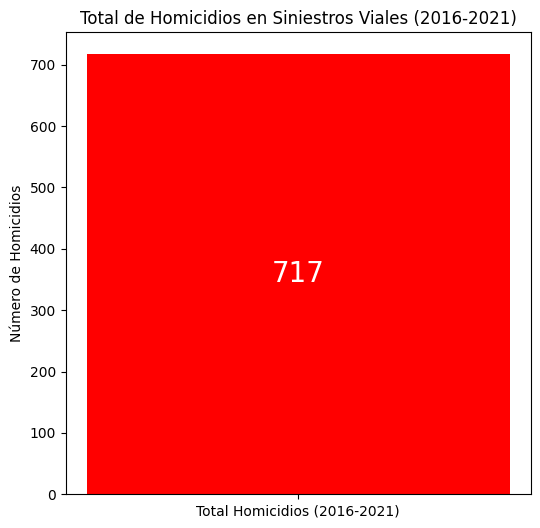

In [38]:
# Filtrar los homicidios entre 2016 y 2021
homicidios_2016_2021 = data_homicidios[(data_homicidios['AAAA'] >= 2016) & (data_homicidios['AAAA'] <= 2021)]

# Calcular el total de homicidios entre 2016 y 2021
total_homicidios = homicidios_2016_2021['N_VICTIMAS'].sum()

# Graficar el total de homicidios como una barra
plt.figure(figsize=(6, 6))
plt.bar(['Total Homicidios (2016-2021)'], [total_homicidios], color='red')
plt.title('Total de Homicidios en Siniestros Viales (2016-2021)')
plt.ylabel('Número de Homicidios')
plt.text(0, total_homicidios / 2, f'{total_homicidios}', ha='center', va='center', color='white', fontsize=20)  # Añadir el número total en la barra
plt.show()


## **6.2. Tasa de homicidios a lo largo del tiempo**

Este gráfico muestra la tasa de homicidios en siniestros viales a lo largo del tiempo, permitiendo visualizar cómo han cambiado estos incidentes en CABA durante el período analizado.


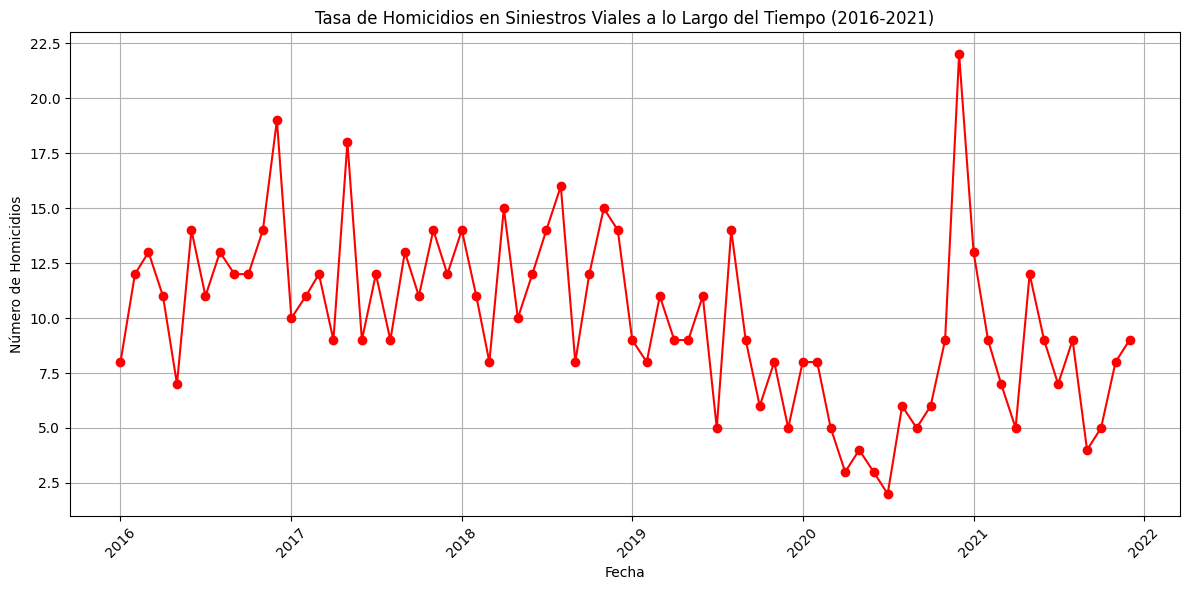

In [41]:
# Asegurarse de que las fechas estén correctamente en formato datetime
homicidios_2016_2021['FECHA'] = pd.to_datetime(homicidios_2016_2021['FECHA'], errors='coerce')

# Agrupar los datos por mes para calcular la tasa de homicidios a lo largo del tiempo
tasa_homicidios_mes = homicidios_2016_2021.groupby(homicidios_2016_2021['FECHA'].dt.to_period('M')).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Graficar la tasa de homicidios a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(tasa_homicidios_mes['FECHA'].dt.to_timestamp(), tasa_homicidios_mes['N_VICTIMAS'], marker='o', color='red')
plt.title('Tasa de Homicidios en Siniestros Viales a lo Largo del Tiempo (2016-2021)')
plt.xlabel('Fecha')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


## **6.3. Homicidios por año**

Este gráfico muestra el número de homicidios viales distribuidos por año, lo que permite ver tendencias anuales en los siniestros viales fatales.


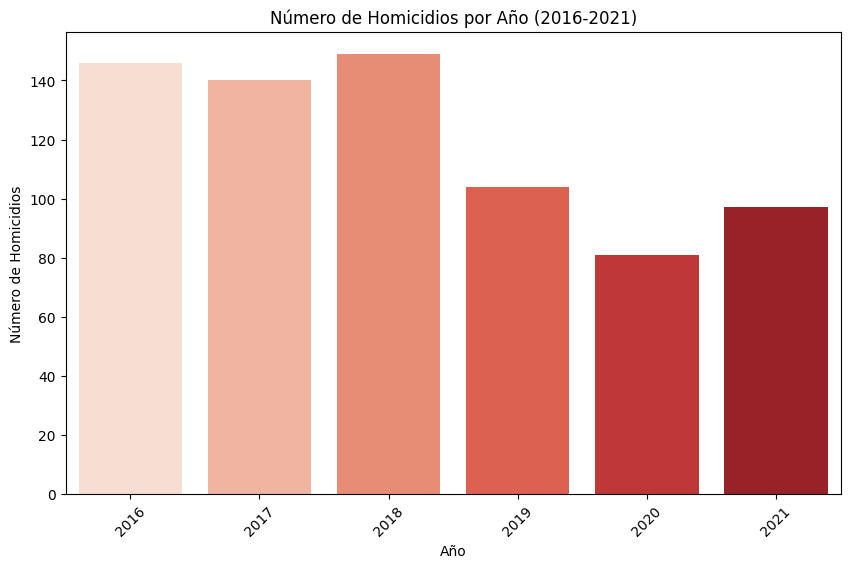

In [37]:
# Filtrar los homicidios entre 2016 y 2021
homicidios_por_año = data_homicidios.groupby('AAAA')['N_VICTIMAS'].sum().reset_index()

# Asegurarse de que todos los años entre 2016 y 2021 estén presentes (incluso aquellos con cero homicidios)
all_years = pd.DataFrame({'AAAA': range(2016, 2022)})
homicidios_por_año = pd.merge(all_years, homicidios_por_año, how='left', on='AAAA').fillna(0)

# Graficar homicidios por año
plt.figure(figsize=(10, 6))
sns.barplot(x='AAAA', y='N_VICTIMAS', data=homicidios_por_año, palette='Reds')
plt.title('Número de Homicidios por Año (2016-2021)')
plt.xlabel('Año')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.show()


## **6.4. Homicidios por comunas**

Este gráfico muestra la distribución de homicidios por comuna en la ciudad de Buenos Aires, ayudando a identificar las zonas más afectadas.


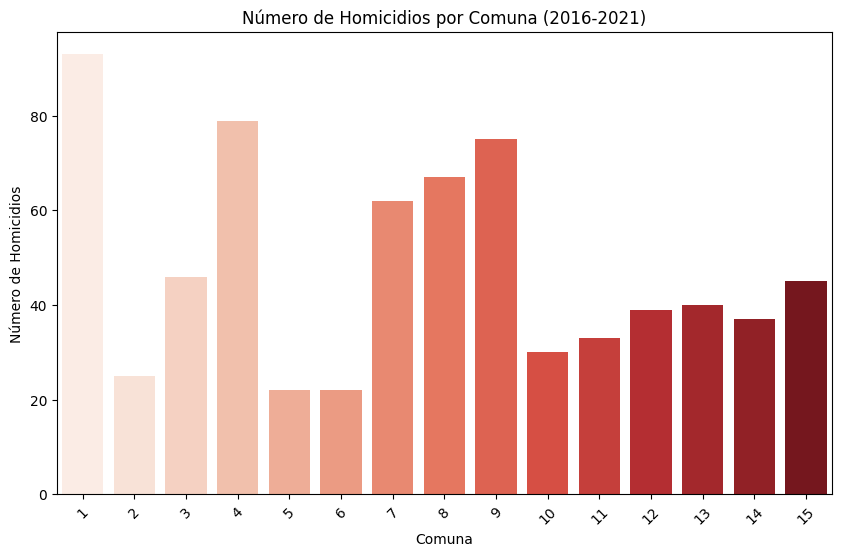

In [44]:
# Homicidios por comuna (2016-2021), sin incluir la comuna 0
homicidios_por_comuna = homicidios_2016_2021[homicidios_2016_2021['COMUNA'] != 0].groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()

# Graficar homicidios por comunas
plt.figure(figsize=(10, 6))
sns.barplot(x='COMUNA', y='N_VICTIMAS', data=homicidios_por_comuna, palette='Reds')
plt.title('Número de Homicidios por Comuna (2016-2021)')
plt.xlabel('Comuna')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.show()


## **6.5. Homicidios por hora del día**

Este gráfico muestra el número de homicidios viales por hora del día, lo que permite analizar si hay franjas horarias más peligrosas.


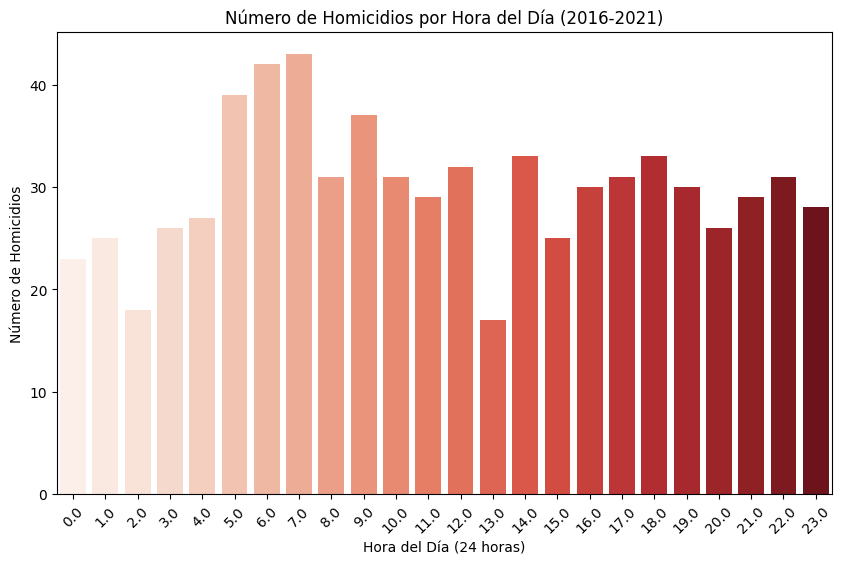

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV original
file_path = '/content/homicidios.xlsx - HECHOS.csv'
data = pd.read_csv(file_path, encoding='latin1')

# Asegurarnos de que los valores de la columna 'HORA' sean válidos y convertirlos a formato de 24 horas
data['hora'] = pd.to_datetime(data['HORA'], format='%H:%M:%S', errors='coerce').dt.hour

# Agrupar los datos por hora del día para sumar el número de víctimas
homicidios_por_hora = data.groupby('hora')['N_VICTIMAS'].sum().reset_index()

# Graficar homicidios por hora del día (formato de 24 horas)
plt.figure(figsize=(10, 6))
sns.barplot(x='hora', y='N_VICTIMAS', data=homicidios_por_hora, palette='Reds')
plt.title('Número de Homicidios por Hora del Día (2016-2021)')
plt.xlabel('Hora del Día (24 horas)')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=45)
plt.show()


## **6.6. KPI: Reducir la tasa de homicidios en siniestros viales en un 10%**

Este gráfico muestra el KPI, que busca reducir la tasa de homicidios viales en CABA en un 10% en comparación con el semestre anterior.


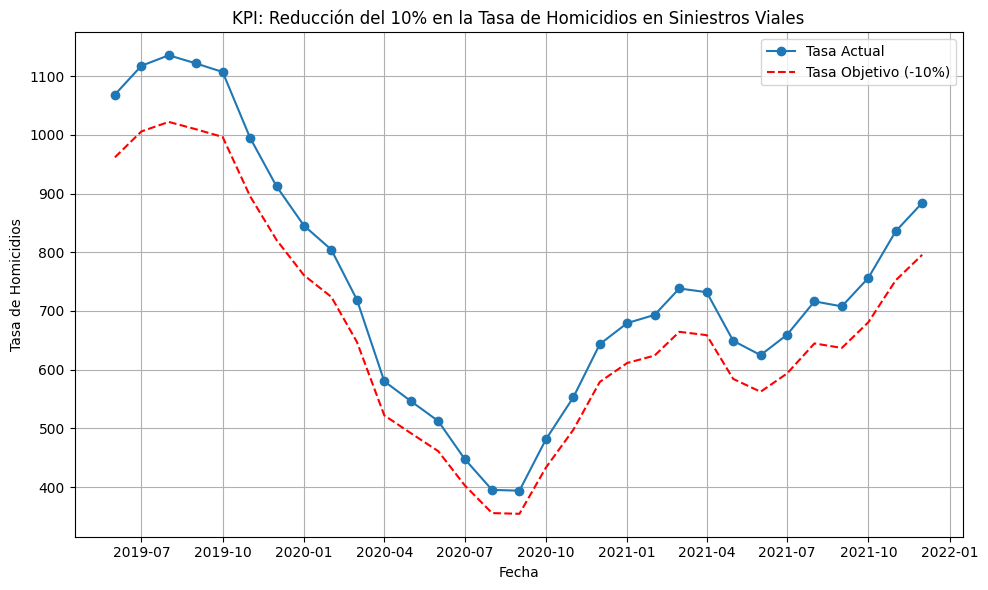

In [69]:
# Cálculo de KPI (reducir la tasa de homicidios en un 10%)
tasa_homicidios_semestre = tasa_homicidios['n_victimas'].rolling(window=6).mean()
tasa_homicidios_semestre_reducida = tasa_homicidios_semestre * 0.9

# Graficar KPI
plt.figure(figsize=(10, 6))
plt.plot(tasa_homicidios['fecha'].dt.to_timestamp(), tasa_homicidios_semestre, label='Tasa Actual', marker='o')
plt.plot(tasa_homicidios['fecha'].dt.to_timestamp(), tasa_homicidios_semestre_reducida, label='Tasa Objetivo (-10%)', linestyle='--', color='red')
plt.title('KPI: Reducción del 10% en la Tasa de Homicidios en Siniestros Viales')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Homicidios')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **7. Conversión y corrección de datos**

En esta parte, realizamos la conversión de tipos de datos para algunas columnas que no estaban correctamente formateadas, como la columna de fecha `FECHA` y las coordenadas `pos x` y `pos y`. También corregimos problemas de codificación en los nombres de las columnas.


In [9]:
# Verificar si hay problemas en los nombres de columnas
print(data_homicidios.columns)

# Renombrar columnas con problemas de codificación
data_homicidios.columns = data_homicidios.columns.str.replace('Ã', 'Ñ').str.replace('Ã³', 'Ó')

# Convertir la columna 'FECHA' a tipo datetime
data_homicidios['FECHA'] = pd.to_datetime(data_homicidios['FECHA'], errors='coerce')

# Convertir 'pos x' y 'pos y' a float
data_homicidios['pos x'] = pd.to_numeric(data_homicidios['pos x'], errors='coerce')
data_homicidios['pos y'] = pd.to_numeric(data_homicidios['pos y'], errors='coerce')

# Verificar los tipos de datos después de las conversiones
print(data_homicidios.dtypes)


Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'DirecciÃ³n Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')
ID                                object
N_VICTIMAS                         int64
FECHA                     datetime64[ns]
AAAA                               int64
MM                                 int64
DD                                 int64
HORA                              object
HH                                object
LUGAR_DEL_HECHO                   object
TIPO_DE_CALLE                     object
Calle                             object
Altura                           float64
Cruce                             object
DirecciÑ³n Normalizada            object
COMUNA                             int64
XY (CABA)                         object
pos x                            float64
pos y              

## **8. Gráfico temporal: Tasa de homicidios**

Aquí analizamos la evolución de la tasa de homicidios a lo largo del tiempo. Se agrupan los datos por mes para observar cómo ha cambiado el número de víctimas fatales con el tiempo.


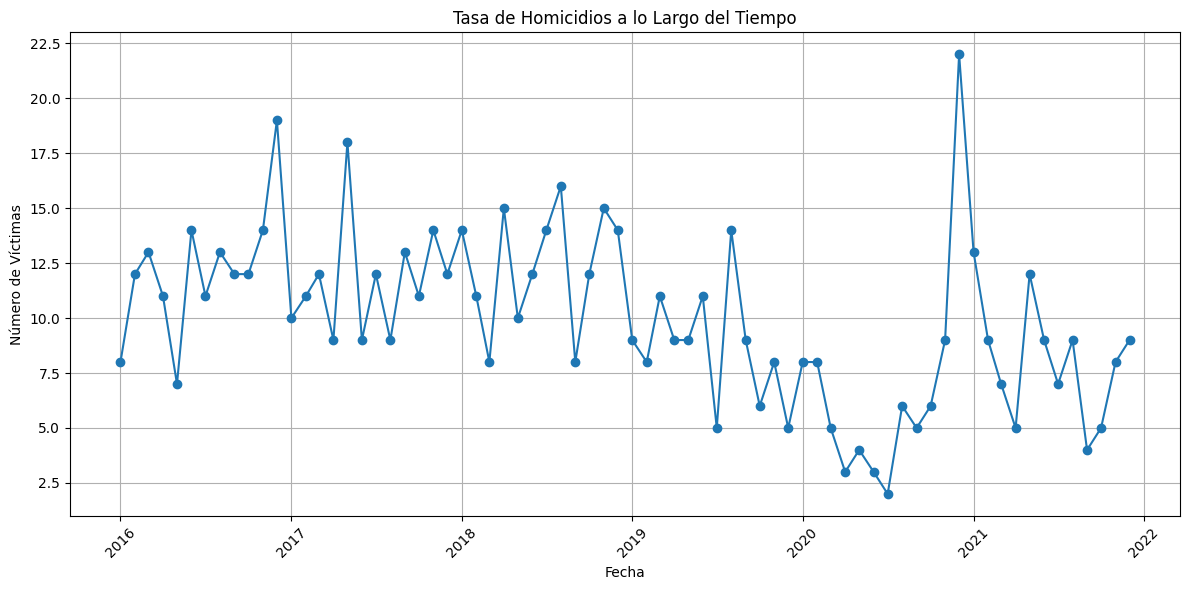

In [10]:
# Calcular la tasa de homicidios por mes
tasa_homicidios = data_homicidios.groupby(data_homicidios['FECHA'].dt.to_period('M')).agg({'N_VICTIMAS': 'sum'}).reset_index()

# Graficar la tasa de homicidios
plt.figure(figsize=(12, 6))
plt.plot(tasa_homicidios['FECHA'].dt.to_timestamp(), tasa_homicidios['N_VICTIMAS'], marker='o')
plt.title('Tasa de Homicidios a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **9. Guardado del dataset limpio**

Finalmente, guardamos el dataset limpio después de aplicar las transformaciones y correcciones necesarias. Esto nos permitirá utilizar los datos procesados en análisis futuros o para alimentar un modelo predictivo.


In [11]:
# Crear una copia del dataset limpio
data_homicidios_clean = data_homicidios.copy()

# Guardar el dataset limpio como CSV
data_homicidios_clean.to_csv('homicidios_limpio.csv', index=False)

# Confirmación
print("Dataset de homicidios limpio guardado como 'homicidios_limpio.csv'.")


Dataset de homicidios limpio guardado como 'homicidios_limpio.csv'.


# **Conclusiones del EDA**

1. Se identificaron y trataron valores faltantes utilizando imputación con medidas estadísticas como la mediana y la moda.
2. Se identificaron y visualizan outliers en la columna `N_VICTIMAS`.
3. Se eliminaron registros duplicados del dataset.
4. Se realizaron conversiones y correcciones en los tipos de


## Análisis Exploratorio de Datos (EDA): Siniestros Viales en CABA

**10. Carga de los datos**

Cargamos el dataset de siniestros viales en formato CSV y revisamos su estructura inicial para entender las columnas y los tipos de datos presentes.


In [17]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Intentar cargar el dataset detectando automáticamente el delimitador y saltando líneas problemáticas
file_path = '/content/siniestros_viales_hechos.csv'

# Cargar el dataset con codificación 'latin1' y detección automática de delimitadores
data_siniestros = pd.read_csv(file_path, sep=None, engine='python', encoding='latin1', on_bad_lines='skip')

# Revisión inicial del dataset
data_siniestros.info()

# Mostrar las primeras filas del dataset para entender la estructura
data_siniestros.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44012 entries, 0 to 44011
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id_hecho               44012 non-null  object
 1   n_victimas             44012 non-null  int64 
 2   fecha                  44012 non-null  object
 3   aaaa                   44012 non-null  int64 
 4   mm                     44012 non-null  int64 
 5   dd                     44012 non-null  int64 
 6   hora                   44012 non-null  object
 7   hh                     44012 non-null  object
 8   direccion_normalizada  44012 non-null  object
 9   calle                  33111 non-null  object
 10  altura                 32665 non-null  object
 11  cruce                  29509 non-null  object
 12  otra_direccion         44012 non-null  object
 13  comuna                 44012 non-null  object
 14  tipo_de_calle          44012 non-null  object
 15  geocodificacion_cab

,id_hecho,n_victimas,fecha,aaaa,mm,dd,hora,hh,direccion_normalizada,calle,...,comuna,tipo_de_calle,geocodificacion_caba,longitud,latitud,participantes,victima,contraparte,gravedad,tipo_de_dato
0,LC-2019-0008283,2,2019-01-04,2019,1,4,17:53:00,17,SD,NaN,...,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
1,LC-2019-0007634,1,2019-01-04,2019,1,4,14:50:00,14,SD,NaN,...,SD,SD,SD,SD,SD,MOTO-SD,MOTO,SD,SD,definitivo
2,LC-2019-0008974,1,2019-01-05,2019,1,5,09:30:00,9,SD,NaN,...,SD,SD,SD,SD,SD,BICICLETA-SD,BICICLETA,SD,SD,definitivo
3,LC-2019-0010983,2,2019-01-06,2019,1,6,22:20:00,22,SD,NaN,...,SD,SD,SD,SD,SD,AUTO-SD,AUTO,SD,SD,definitivo
4,LC-2019-0011092,1,2019-01-07,2019,1,7,03:50:00,3,SD,NaN,...,SD,SD,SD,SD,SD,PEATON-SD,PEATON,SD,SD,definitivo


## **11. Verificación de valores faltantes**

Revisamos la cantidad de valores faltantes en cada columna para planificar el tratamiento de estos valores faltantes.


In [18]:
# Contar valores faltantes por columna
missing_values = data_siniestros.isnull().sum()
print("Valores faltantes por columna:\n", missing_values)


Valores faltantes por columna:
 id_hecho                     0
n_victimas                   0
fecha                        0
aaaa                         0
mm                           0
dd                           0
hora                         0
hh                           0
direccion_normalizada        0
calle                    10901
altura                   11347
cruce                    14503
otra_direccion               0
comuna                       0
tipo_de_calle                0
geocodificacion_caba         0
longitud                   216
latitud                    216
participantes                0
victima                      0
contraparte                  0
gravedad                     0
tipo_de_dato                 0
dtype: int64


## **12. Imputación de valores faltantes**

Imputamos los valores faltantes en las columnas `latitud`, `longitud`, `calle`, `altura` y `cruce` utilizando la media o la moda, según corresponda:
- `latitud` y `longitud` se imputarán con la media.
- `calle`, `altura` y `cruce` se imputarán con la moda, ya que son variables categóricas.


In [19]:
# Imputar valores faltantes en 'latitud' y 'longitud' reemplazando 'SD', 'sd' y '.' con None y luego con la media
data_siniestros['latitud'] = data_siniestros['latitud'].replace(['SD', 'sd', '.'], None).astype(float)
data_siniestros['longitud'] = data_siniestros['longitud'].replace(['SD', 'sd', '.'], None).astype(float)
data_siniestros['latitud'].fillna(data_siniestros['latitud'].mean(), inplace=True)
data_siniestros['longitud'].fillna(data_siniestros['longitud'].mean(), inplace=True)

# Imputar valores faltantes en 'calle', 'altura' y 'cruce' con la moda
data_siniestros['calle'] = data_siniestros['calle'].fillna(data_siniestros['calle'].mode()[0])
data_siniestros['altura'] = data_siniestros['altura'].fillna(data_siniestros['altura'].mode()[0])
data_siniestros['cruce'] = data_siniestros['cruce'].fillna(data_siniestros['cruce'].mode()[0])

# Verificar valores faltantes después de la imputación
missing_values_post = data_siniestros.isnull().sum()
print("Valores faltantes después de la imputación:\n", missing_values_post)


Valores faltantes después de la imputación:
 id_hecho                 0
n_victimas               0
fecha                    0
aaaa                     0
mm                       0
dd                       0
hora                     0
hh                       0
direccion_normalizada    0
calle                    0
altura                   0
cruce                    0
otra_direccion           0
comuna                   0
tipo_de_calle            0
geocodificacion_caba     0
longitud                 0
latitud                  0
participantes            0
victima                  0
contraparte              0
gravedad                 0
tipo_de_dato             0
dtype: int64


## **13. Tratamiento de outliers**

Identificamos los outliers (valores atípicos) en la columna `n_victimas` utilizando un diagrama de caja (boxplot). Esto nos permite visualizar la distribución y la presencia de posibles valores atípicos.


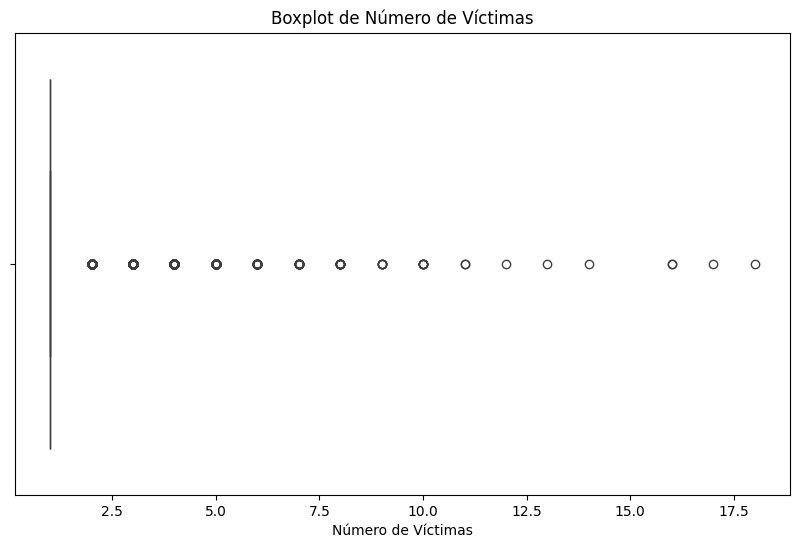

In [20]:
# Gráfico boxplot para visualizar los outliers en la columna 'n_victimas'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_siniestros['n_victimas'])
plt.title('Boxplot de Número de Víctimas')
plt.xlabel('Número de Víctimas')
plt.show()


## **14. Verificación y eliminación de registros duplicados**

Verificamos si existen registros duplicados en el dataset. Si se encuentran, procederemos a eliminarlos para evitar sesgos en el análisis.


In [21]:
# Verificar si existen registros duplicados
duplicados = data_siniestros.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

# Eliminar registros duplicados si existen
data_siniestros.drop_duplicates(inplace=True)

# Verificar nuevamente
duplicados_post = data_siniestros.duplicated().sum()
print(f"Duplicados después de la eliminación: {duplicados_post}")


Número de registros duplicados: 0
Duplicados después de la eliminación: 0


## 15.1 Total de Accidentes Distintos a Homicidios (2016-2021)
En este punto, vamos a contar el total de accidentes que no sean homicidios usando el dataset de siniestros, limitando el análisis a los años 2016-2021.


In [71]:
# Asegurarnos de que la columna 'fecha' esté en formato datetime
data_siniestros['fecha'] = pd.to_datetime(data_siniestros['fecha'])

# Filtrar los accidentes ocurridos entre 2016 y 2021
accidentes_periodo = data_siniestros[(data_siniestros['fecha'].dt.year >= 2016) & (data_siniestros['fecha'].dt.year <= 2021)]

# Filtrar los accidentes distintos a homicidios
accidentes_no_homicidios = accidentes_periodo[accidentes_periodo['gravedad'] != 'Homicidio']

# Contar el total de accidentes distintos a homicidios
total_accidentes_no_homicidios = accidentes_no_homicidios.shape[0]

print(f"Total de accidentes distintos a homicidios (2016-2021): {total_accidentes_no_homicidios}")


Total de accidentes distintos a homicidios (2016-2021): 24035


## 15.2 Accidentes por Comuna Distintos a Homicidios (2016-2021)
En este punto, agrupamos los accidentes distintos a homicidios por comuna, limitando el análisis a los años 2016-2021.


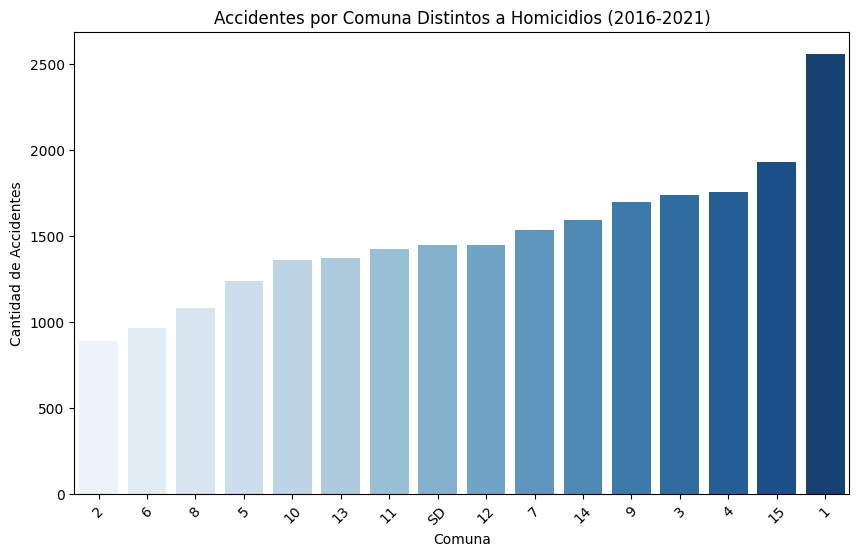

In [80]:
# Filtrar los accidentes ocurridos entre 2016 y 2021
accidentes_periodo = data_siniestros[(data_siniestros['fecha'].dt.year >= 2016) & (data_siniestros['fecha'].dt.year <= 2021)]

# Filtrar los accidentes distintos a homicidios
accidentes_no_homicidios = accidentes_periodo[accidentes_periodo['gravedad'] != 'Homicidio']

# Agrupar los accidentes distintos a homicidios por comuna
accidentes_por_comuna = accidentes_no_homicidios.groupby('comuna').size().reset_index(name='count')

# Ordenar las comunas por el número de accidentes de menor a mayor
accidentes_por_comuna = accidentes_por_comuna.sort_values(by='count', ascending=True)

# Graficar accidentes por comuna ordenados de menor a mayor
plt.figure(figsize=(10, 6))

# Ajustar el orden en el gráfico según la cantidad de accidentes
sns.barplot(x='comuna', y='count', data=accidentes_por_comuna, palette='Blues',
            order=accidentes_por_comuna['comuna'])
plt.title('Accidentes por Comuna Distintos a Homicidios (2016-2021)')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()


## 15.3 Accidentes por Calles Distintos a Homicidios (2016-2021)
Aquí agrupamos los accidentes distintos a homicidios por calle, limitando el análisis a los años 2016-2021, y mostramos las 10 calles con más accidentes.


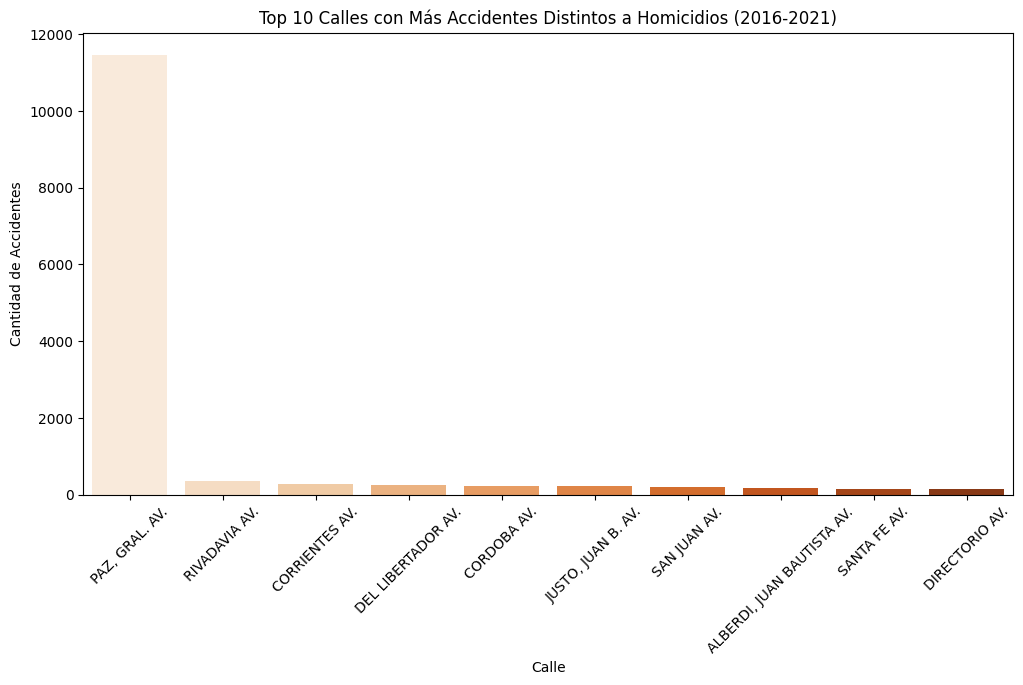

In [73]:
# Filtrar los accidentes ocurridos entre 2016 y 2021
accidentes_periodo = data_siniestros[(data_siniestros['fecha'].dt.year >= 2016) & (data_siniestros['fecha'].dt.year <= 2021)]

# Filtrar los accidentes distintos a homicidios
accidentes_no_homicidios = accidentes_periodo[accidentes_periodo['gravedad'] != 'Homicidio']

# Agrupar los accidentes distintos a homicidios por calle
accidentes_por_calle = accidentes_no_homicidios.groupby('calle').size().reset_index(name='count')

# Filtrar las 10 calles con más accidentes
top_calles_accidentes = accidentes_por_calle.nlargest(10, 'count')

# Graficar las calles con más accidentes
plt.figure(figsize=(12, 6))
sns.barplot(x='calle', y='count', data=top_calles_accidentes, palette='Oranges')
plt.title('Top 10 Calles con Más Accidentes Distintos a Homicidios (2016-2021)')
plt.xlabel('Calle')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()


## 15.4 KPI de Accidentes (2016-2021)
En este punto, calculamos un KPI para los accidentes, comparando la cantidad en los últimos 6 meses con los 6 meses anteriores, limitando el análisis a los años 2016-2021.


KPI de reducción de accidentes en los últimos 6 meses (2016-2021): -35.37%
Accidentes esperados con una reducción del 10%: 2990


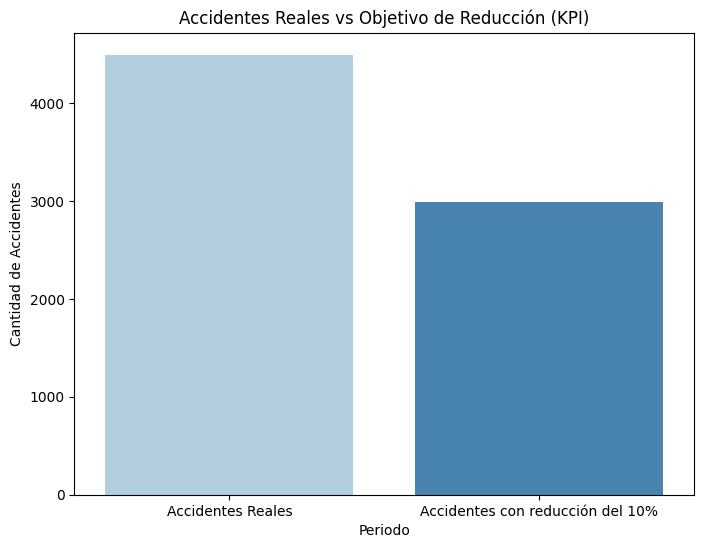

In [85]:
# KPI: Comparar la cantidad de accidentes en los últimos 6 meses con los 6 meses anteriores
ultimos_6_meses = accidentes_por_mes.tail(6)['count'].sum()
previos_6_meses = accidentes_por_mes.tail(12).head(6)['count'].sum()

# Calcular la variación porcentual
kpi_reduccion_accidentes = ((previos_6_meses - ultimos_6_meses) / previos_6_meses) * 100

# Calcular el número de accidentes que deberían haber ocurrido si se hubiera alcanzado la reducción del 10%
reduction_goal = 10  # Puedes ajustar este valor si es diferente
accidentes_esperados = previos_6_meses * (1 - reduction_goal / 100)

# Mostrar el KPI
print(f"KPI de reducción de accidentes en los últimos 6 meses (2016-2021): {kpi_reduccion_accidentes:.2f}%")
print(f"Accidentes esperados con una reducción del {reduction_goal}%: {accidentes_esperados:.0f}")

# Graficar la comparación de los accidentes reales y los esperados por el KPI
kpi_data = pd.DataFrame({
    'Periodo': ['Accidentes Reales', f'Accidentes con reducción del {reduction_goal}%'],
    'Accidentes': [ultimos_6_meses, accidentes_esperados]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Periodo', y='Accidentes', data=kpi_data, palette='Blues')
plt.title('Accidentes Reales vs Objetivo de Reducción (KPI)')
plt.ylabel('Cantidad de Accidentes')
plt.show()


## **16. Guardado del dataset limpio**

Finalmente, guardamos el dataset limpio en un archivo CSV para futuros análisis o modelado.


In [25]:
# Guardar el dataset limpio en un archivo CSV
data_siniestros.to_csv('data_siniestros_cleaned.csv', index=False)
print("El dataset limpio ha sido guardado como 'data_siniestros_cleaned.csv'.")


El dataset limpio ha sido guardado como 'data_siniestros_cleaned.csv'.


# **Conclusiones del EDA**

1. Se imputaron los valores faltantes en las columnas `latitud`, `longitud`, `calle`, `altura` y `cruce`.
2. Se identificaron outliers en la variable `n_victimas` mediante un gráfico boxplot.
3. Se eliminaron registros duplicados que podrían sesgar el análisis.
4. Se realizaron visualizaciones para analizar la distribución del número de víctimas por año, la cantidad de accidentes por comuna, y la evolución temporal de los homicidios viales.
